In [1]:
# look especially 20 July to 20 Aug

In [17]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
detection_ds = xr.open_dataset("/project/amp/brianpm/TemperatureExtremes/Derived/CPC_tmax_90pct_event_detection.nc")

In [9]:
detection_ds['lon']

<xarray.DataArray 'lon' (lon: 720)>
array([2.5000e-01, 7.5000e-01, 1.2500e+00, ..., 3.5875e+02, 3.5925e+02,
       3.5975e+02], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
Attributes:
    long_name:           Longitude
    units:               degrees_east
    axis:                X
    standard_name:       longitude
    actual_range:        [2.5000e-01 3.5975e+02]
    coordinate_defines:  center

In [5]:
events = detection_ds['Event_ID']

In [8]:
interval = events.sel(time=slice("2003-07-01", "2003-09-01"))

In [10]:
# Grenoble: 45°10′18″N 5°43′21″E
interval.sel(lat=(45+(1/6)+(18/3600)), lon=(5+(43/60)+(21/3600)), method='nearest')

<xarray.DataArray 'Event_ID' (time: 63)>
array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 370.,
       370., 370., 370.,   0.,   0.,   0., 371., 371.,   0.,   0.,   0.,   0.,
         0., 372.,   0.,   0.,   0.,   0.,   0.,   0., 373., 373., 373., 373.,
       373., 373., 373., 373., 373., 373., 373., 373., 373.,   0., 374.,   0.,
         0.,   0.,   0.,   0.,   0., 375., 375.,   0.,   0., 376., 376.,   0.,
         0.,   0.,   0.])
Coordinates:
    lat      float32 45.25
    lon      float32 5.75
  * time     (time) datetime64[ns] 2003-07-01 2003-07-02 ... 2003-09-01
Attributes:
    long_name:  Event ID Number based on Tmax > 90th percentile

In [11]:
# Paris: 48°51′24″N 2°21′03″E
Paris = (48 + (51/60) + (24/3600), 2 +  (21/60) + (3/3600))

interval.sel(lat=Paris[0], lon=Paris[1], method='nearest')

<xarray.DataArray 'Event_ID' (time: 63)>
array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 425., 425.,   0.,
       426., 426., 426.,   0.,   0.,   0., 427.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 428., 428., 428.,
       428., 428., 428., 428., 428., 428., 428., 428.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.])
Coordinates:
    lat      float32 48.75
    lon      float32 2.25
  * time     (time) datetime64[ns] 2003-07-01 2003-07-02 ... 2003-09-01
Attributes:
    long_name:  Event ID Number based on Tmax > 90th percentile

In [15]:
interval.shape #.values.nonzero()

(63, 360, 720)

In [18]:
days_mask = xr.where(interval > 0, 1, 0)
days_count = days_mask.sum(dim='time')
days_count

<xarray.DataArray 'Event_ID' (lat: 360, lon: 720)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75

In [63]:
lon_orig = days_count['lon']
x_rolled = days_count.assign_coords(lon=(np.where( lon_orig['lon'] >= 180, lon_orig['lon'] - 360, lon_orig['lon'])))
x_rolled = x_rolled.roll(lon=(len(lon_orig) // 2), roll_coords=False)
# assign_coords(lon=(np.where( lon_orig >= 180, -1* (lon_orig % 180), lon_orig))).

In [64]:
x_rolled['lon'].values.astype(int)

array([   0,    0,    1,    1,    2,    2,    3,    3,    4,    4,    5,
          5,    6,    6,    7,    7,    8,    8,    9,    9,   10,   10,
         11,   11,   12,   12,   13,   13,   14,   14,   15,   15,   16,
         16,   17,   17,   18,   18,   19,   19,   20,   20,   21,   21,
         22,   22,   23,   23,   24,   24,   25,   25,   26,   26,   27,
         27,   28,   28,   29,   29,   30,   30,   31,   31,   32,   32,
         33,   33,   34,   34,   35,   35,   36,   36,   37,   37,   38,
         38,   39,   39,   40,   40,   41,   41,   42,   42,   43,   43,
         44,   44,   45,   45,   46,   46,   47,   47,   48,   48,   49,
         49,   50,   50,   51,   51,   52,   52,   53,   53,   54,   54,
         55,   55,   56,   56,   57,   57,   58,   58,   59,   59,   60,
         60,   61,   61,   62,   62,   63,   63,   64,   64,   65,   65,
         66,   66,   67,   67,   68,   68,   69,   69,   70,   70,   71,
         71,   72,   72,   73,   73,   74,   74,   

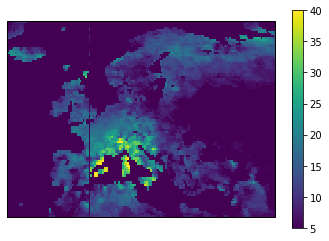

In [79]:
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.Robinson()})
lons, lats = np.meshgrid(x_rolled['lon'], days_count['lat'])
img = ax.pcolormesh(lons, lats, days_count, transform=ccrs.PlateCarree(), vmin=5, vmax=40)
ax.set_extent((-20, 45, 30, 70))
fig.colorbar(img)

In [66]:
x_rolled

<xarray.DataArray 'Event_ID' (lat: 360, lon: 720)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... -1.75 -1.25 -0.75 -0.25

In [67]:
lon

array([   0.25,    0.75,    1.25,    1.75,    2.25,    2.75,    3.25,
          3.75,    4.25,    4.75,    5.25,    5.75,    6.25,    6.75,
          7.25,    7.75,    8.25,    8.75,    9.25,    9.75,   10.25,
         10.75,   11.25,   11.75,   12.25,   12.75,   13.25,   13.75,
         14.25,   14.75,   15.25,   15.75,   16.25,   16.75,   17.25,
         17.75,   18.25,   18.75,   19.25,   19.75,   20.25,   20.75,
         21.25,   21.75,   22.25,   22.75,   23.25,   23.75,   24.25,
         24.75,   25.25,   25.75,   26.25,   26.75,   27.25,   27.75,
         28.25,   28.75,   29.25,   29.75,   30.25,   30.75,   31.25,
         31.75,   32.25,   32.75,   33.25,   33.75,   34.25,   34.75,
         35.25,   35.75,   36.25,   36.75,   37.25,   37.75,   38.25,
         38.75,   39.25,   39.75,   40.25,   40.75,   41.25,   41.75,
         42.25,   42.75,   43.25,   43.75,   44.25,   44.75,   45.25,
         45.75,   46.25,   46.75,   47.25,   47.75,   48.25,   48.75,
         49.25,   49